In [ ]:
# reference: https://platform.openai.com/docs/api-reference/images/create

In [1]:
import os
import io
import openai
import base64
from PIL import Image
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
with open('API_keys/my_key') as f: # API key file
    api_key = f.read()
openai.api_key = api_key
os.environ['OPENAI_API_KEY'] = api_key

## DALL‧E

In [3]:
prompt = 'A fuzzy and adorable cat peacefully sleeping on a bed'

In [4]:
response = openai.Image.create(
    prompt=prompt,
    n=1, # 1~10
    size='512x512', # 256x256, 512x512, 1024x1024
    response_format='b64_json' # url, b64_json
)

In [6]:
image_b64 = response['data'][0]['b64_json']

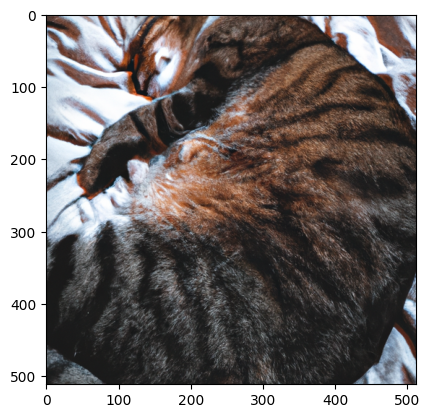

In [7]:
image = Image.open(io.BytesIO(base64.b64decode(image_b64)))
plt.imshow(image)

file_name = f'{datetime.now().strftime("%Y%m%d_%H%M%S")}-{prompt}'
image.save(f'images/{file_name}.png')